In [1]:
from scipy import stats
import pandas as pd
import numpy as np

In [7]:
import warnings
warnings.simplefilter('ignore')

In [8]:
beml_df = pd.read_csv('beml_df.csv')

In [9]:
glaxo_df = pd.read_csv('glaxo_df.csv')

#### Before performing confidence interval for gain column, we have to check whether the "gain" is normally distributed in both the beml and glaxo datasets. Hence, we are constructing distplot to know whether it is normally distributed or not


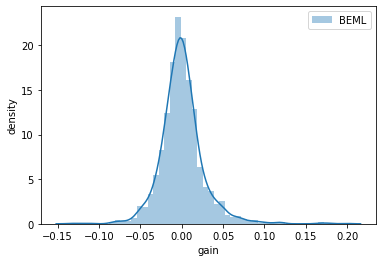

In [10]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
sn.distplot(beml_df.gain, label='BEML');
plt.xlabel('gain');
plt.ylabel('density');
plt.legend();

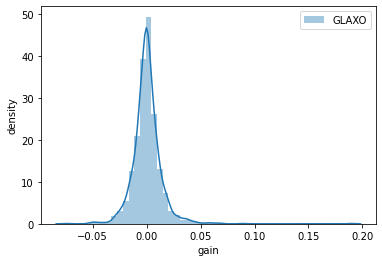

In [11]:
sn.distplot(glaxo_df.gain, label='GLAXO');
plt.xlabel('gain');
plt.ylabel('density');
plt.legend();

#### From the above distplot, it is observed that the gain is normally ditributed in both the datasets, so now we can carry on with the calculation of confidence interval (if it is not normally distributed then perform z-score standardisation and then calculate the confidence interval)


## Calculating gain interval for BEML and GLAXO respectively for 90% conf. interval

In [17]:
# calculating gain interval for beml at 90% conf. interval
beml_df_ci = stats.norm.interval(0.95 , loc=beml_df.gain.mean(), scale=beml_df.gain.std()) #here 0.95 is the critical value for 90% conf. interval
print("Gain at 90% confidence interval is:", np.round(beml_df_ci , 4))

Gain at 90% confidence interval is: [-0.0515  0.0521]


In [18]:
# calculating gain interval for glaxo at 90% conf. interval
glaxo_df_ci = stats.norm.interval(0.95 , loc=glaxo_df.gain.mean(), scale=glaxo_df.gain.std()) #here 0.95 is the critical value for 90% conf. interval
print("Gain at 90% confidence interval is:", np.round(glaxo_df_ci , 4))

Gain at 90% confidence interval is: [-0.0258  0.0266]


## Calculating gain interval for BEML and GLAXO respectively for 95% conf. interval


In [20]:
# calculating gain interval for beml at 95% conf. interval
beml_df_ci = stats.norm.interval(0.975 , loc=beml_df.gain.mean(), scale=beml_df.gain.std()) #here 0.975 is the critical value for 95% conf. interval
print("Gain at 95% confidence interval is:", np.round(beml_df_ci , 4))

Gain at 95% confidence interval is: [-0.059   0.0595]


In [21]:
# calculating gain interval for glaxo at 95% conf. interval
glaxo_df_ci = stats.norm.interval(0.975 , loc=glaxo_df.gain.mean(), scale=glaxo_df.gain.std()) #here 0.975 is the critical value for 95% conf. interval
print("Gain at 95% confidence interval is:", np.round(glaxo_df_ci , 4))

Gain at 95% confidence interval is: [-0.0296  0.0303]


#### As we can see, that compared to 90% conf. interval, the interval width for 95% conf. interval is more and also the interval value is not precise. So, high confidence  also with the precise interval have to be considered.

#### If the std. dev. for the population is not given, then we have to use t-distribution to calculate the interval

## Calculating gain interval using t-distribution for 95% conf. interval

In [22]:
#beml data
beml_df_ci = stats.t.interval(0.975, df=len(beml_df) - 1, loc=beml_df.gain.mean(), scale=beml_df.gain.std())
print("Gain at 95% confidence interval using t-distribution is:" , np.round(beml_df_ci , 4))

Gain at 95% confidence interval using t-distribution is: [-0.059   0.0596]


In [24]:
#glaxo data
glaxo_df_ci = stats.t.interval(0.975 ,df=len(glaxo_df) - 1, loc=glaxo_df.gain.mean(), scale=glaxo_df.gain.std()) 
print("Gain at 95% confidence interval is:", np.round(glaxo_df_ci , 4))

Gain at 95% confidence interval is: [-0.0296  0.0304]


#### It is observed that the gain at 95% confidence interval for BEML data in both  std. normal and t distribution is approximately equal. Similarly, it is obseved for GLAXO data too. This is because, as we increase the degrees of freedom, the t- distribution matches up with the std. normal distribution.